# Enunciado

In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import clear_output

## Preparación de datos (1.0pt)

Explore el archivo `covid19_confirmados.csv` y utilice la función `pd.read_csv` para importarlo como un `DataFrame` considerando las siguientes indicaciones:

1. Utilice el nombre de país como índice.
1. Elimine las columnas `Lat` y `Long`.
1. Use TimeStamps para las columnas asociadas a fechas.
1. Reduzca la columna `Province/State`. El DataFrame resultante debe tener los totales a nivel país.

In [141]:
data = pd.read_csv('data/covid19_confirmados.csv',
                   index_col='Country/Region'
                 )
data.drop(['Lat','Long'],axis=1,inplace=True)

data_confirmados = data.groupby('Country/Region',sort=True).sum()
data_confirmados.drop(["Province/State"],axis=1,inplace=True)
data_confirmados.columns = pd.to_datetime(data_confirmados.columns,format= '%m/%d/%y')
data_confirmados


,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,0,0,0,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,0,0,0,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,0,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,0,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,655750,655750,655750,656287,656287,656287,656287,656287,656287,656287
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11806,11806,11806,11808,11812,11812,11812,11812,11813,11813


Explore el archivo `population_by_country_2020.csv` y utilice la función `pd.read_csv` de pandas para importarlo como un `DataFrame`. Utilice el nombre de país como índice principal. 

Nota: Algunos siglas o nombres podrían no calzar con el `DataFrame` anterior, explore y corrija programaticamente dichos errores.

In [142]:
d_popu = pd.read_csv('data/poblacion_mundial2020.csv',
                   index_col='Country (or dependency)'
                 )
data_popu = d_popu.rename_axis('Country/Region')

In [143]:
filtro = data_confirmados.merge(data_popu, how='outer',on='Country/Region', indicator='Filtro')
paises_1 = filtro[filtro.Filtro == 'left_only'].index.to_list()

# Visualizar los países del primer dataframe que no coinciden
paises_1

['Antarctica',
 'Burma',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Czechia',
 'Diamond Princess',
 'Korea, South',
 'Kosovo',
 'MS Zaandam',
 'Saint Kitts and Nevis',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Summer Olympics 2020',
 'Taiwan*',
 'US',
 'West Bank and Gaza',
 'Winter Olympics 2022']

In [144]:
paises_2 = filtro[filtro.Filtro == 'right_only'].index.to_list()

# Visualizar los países del segundo dataframe que no coinciden
paises_2

['United States',
 'DR Congo',
 'Myanmar',
 'South Korea',
 "Côte d'Ivoire",
 'North Korea',
 'Taiwan',
 'Czech Republic (Czechia)',
 'Hong Kong',
 'Turkmenistan',
 'Congo',
 'State of Palestine',
 'Puerto Rico',
 'Réunion',
 'Macao',
 'Western Sahara',
 'Guadeloupe',
 'Martinique',
 'French Guiana',
 'New Caledonia',
 'French Polynesia',
 'Mayotte',
 'Sao Tome & Principe',
 'Channel Islands',
 'Guam',
 'Curaçao',
 'St. Vincent & Grenadines',
 'Aruba',
 'U.S. Virgin Islands',
 'Isle of Man',
 'Cayman Islands',
 'Bermuda',
 'Northern Mariana Islands',
 'Greenland',
 'American Samoa',
 'Saint Kitts & Nevis',
 'Faeroe Islands',
 'Sint Maarten',
 'Turks and Caicos',
 'Saint Martin',
 'Gibraltar',
 'British Virgin Islands',
 'Caribbean Netherlands',
 'Cook Islands',
 'Anguilla',
 'Tuvalu',
 'Wallis & Futuna',
 'Nauru',
 'Saint Barthelemy',
 'Saint Helena',
 'Saint Pierre & Miquelon',
 'Montserrat',
 'Falkland Islands',
 'Niue',
 'Tokelau']

In [145]:
# Arreglo de los nombres, haciendo coincidir los países con error de escritura
data_popu.rename({'United States' : 'US',
                  'DR Congo' : 'Congo (Kinshasa)',
                  'Myanmar' : 'Burma',
                  'South Korea' : 'Korea, South',
                  "Côte d'Ivoire" : "Cote d'Ivoire",
                  'Taiwan' : 'Taiwan*',
                  'Czech Republic (Czechia)' : 'Czechia',
                  'Congo' : 'Congo (Brazzaville)',
                  'Sao Tome & Principe' : 'Sao Tome and Principe',
                  'St. Vincent & Grenadines' : 'Saint Vincent and the Grenadines',
                  'Saint Kitts & Nevis' : 'Saint Kitts and Nevis', 
                 }, axis=0, inplace=True)

Realice un `merge` de los `DataFrame` anteriores. El objetivo es asignar un valor de `Population` a cada elemento del primer `DataFrame`. Indique las filas donde no se puede realizar el `merge` y luego descártelas de su `DataFrame` final.

In [146]:
data_conf_popu_filter = data_confirmados.merge(data_popu, how='outer', left_index=True, right_index=True, indicator='filtro')
data_conf_popu_filter.drop(['Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
        axis=1,
        inplace=True)

# Encontrar países donde no hay coincidencias
paises_no_coincidentes = data_conf_popu_filter[data_conf_popu_filter.filtro == 'right_only'].index.to_list() +  data_conf_popu_filter[data_conf_popu_filter.filtro == 'left_only'].index.to_list()
print('Los países no coincidentes son: \n', paises_no_coincidentes)

Los países no coincidentes son: 
 ['American Samoa', 'Anguilla', 'Aruba', 'Bermuda', 'British Virgin Islands', 'Caribbean Netherlands', 'Cayman Islands', 'Channel Islands', 'Cook Islands', 'Curaçao', 'Faeroe Islands', 'Falkland Islands', 'French Guiana', 'French Polynesia', 'Gibraltar', 'Greenland', 'Guadeloupe', 'Guam', 'Hong Kong', 'Isle of Man', 'Macao', 'Martinique', 'Mayotte', 'Montserrat', 'Nauru', 'New Caledonia', 'Niue', 'North Korea', 'Northern Mariana Islands', 'Puerto Rico', 'Réunion', 'Saint Barthelemy', 'Saint Helena', 'Saint Martin', 'Saint Pierre & Miquelon', 'Sint Maarten', 'State of Palestine', 'Tokelau', 'Turkmenistan', 'Turks and Caicos', 'Tuvalu', 'U.S. Virgin Islands', 'Wallis & Futuna', 'Western Sahara', 'Antarctica', 'Diamond Princess', 'Kosovo', 'MS Zaandam', 'Summer Olympics 2020', 'West Bank and Gaza', 'Winter Olympics 2022']


In [147]:
data_conf_popu = data_confirmados.merge(data_popu, how='outer', left_index=True, right_index=True)
data_conf_popu.drop(['Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
        axis=1,
        inplace=True)

# Eliminar del dataframe las filas donde no coinciden las columnas de interés
data_conf_popu = data_conf_popu.dropna()

Repita el procedimiento para los archivos `covid19_recuperados.csv` y `covid19_muertes.csv`.

In [148]:
# Importar datas
data_muerte = pd.read_csv('data/covid19_muertes.csv', index_col='Country/Region')
data_muerte.drop(['Lat','Long'],axis=1,inplace=True)
data_muertes = data_muerte.groupby('Country/Region',sort=False).sum()
data_muertes.drop(["Province/State"],axis=1,inplace=True)
data_muertes.columns = pd.to_datetime(data_muertes.columns,format= '%m/%d/%y')


data_recu = pd.read_csv('data/covid19_recuperados.csv', index_col='Country/Region')
data_recu.drop(['Lat','Long'],axis=1,inplace=True)
data_recu.drop(["Province/State"],axis=1,inplace=True)
data_recuperados = data_recu.groupby('Country/Region',sort=False).sum()
data_recuperados.columns = pd.to_datetime(data_recuperados.columns,format= '%m/%d/%y')

# Merge muertes-poblacion
data_mrt_popu = data_muertes.merge(data_popu, how='inner', left_index=True, right_index=True)
data_mrt_popu.drop(['Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
        axis=1,
        inplace=True)

# Merge recuperados-poblacion
data_recu_popu = data_recuperados.merge(data_popu, how='inner', left_index=True, right_index=True)
data_recu_popu.drop(['Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
        axis=1,
        inplace=True)

data_mrt_popu = data_mrt_popu.dropna()
data_recu_popu = data_recu_popu.dropna()

## Análisis global (1.5pt)

Escriba una función que reciba una fecha y que retorne las siguientes series: 

1. Tasa de incidencia: Casos confirmados por 100.000 dividido población total.
1. Tasa de recuperación: Casos recuperados por 100.000 dividido población total.
1. Tasa de mortalidad: Casos decesos por 100.000 dividido población total.

Ahora, considerando los siguientes dos puntos temporales:

- 22 de Enero de 2021.
- 22 de Enero de 2022.

Muestre los nombres y los valores de los 3 países con:

1. La mayor y menor tasa de incidencia, respectivamente.
1. La mayor y menor tasa de recuperación, respectivamente.
1. La mayor y menor tasa de mortalidad, respectivamente.

Muestre también la posición de Chile en el ranking.

In [149]:
# Tasa de incidencia confirmados:
def Tasas(f):
    c = (data_conf_popu[f]*100000)/data_conf_popu['Population (2020)']
    r = (data_recu_popu[f]*100000)/data_conf_popu['Population (2020)']
    m = (data_mrt_popu[f]*100000)/data_conf_popu['Population (2020)']
    return c,r,m

In [150]:
# Análisis del 1/22/21:
t_incidencia_1_22_21,t_recuperados_1_22_21,t_muerte_1_22_21 = Tasas(pd.to_datetime('01/22/2021'))
t_incidencia_1_22_21_sorted = t_incidencia_1_22_21.sort_values(ascending=False)
t_recuperados_1_22_21_sorted = t_recuperados_1_22_21.sort_values(ascending=False)
t_muerte_1_22_21_sorted = t_muerte_1_22_21.sort_values(ascending=False)

Tasa_mayor_incidencia_nombres = t_incidencia_1_22_21_sorted.head(n=3).index.tolist()
Tasa_mayor_incidencia_valores = t_incidencia_1_22_21_sorted.head(n=3).tolist()

Tasa_menor_incidencia_nombres = t_incidencia_1_22_21_sorted.tail(n=3).index.tolist()
Tasa_menor_incidencia_valores = t_incidencia_1_22_21_sorted.tail(n=3).tolist()

Tasa_mayor_recuperados_nombres = t_recuperados_1_22_21_sorted.head(n=3).index.tolist()
Tasa_mayor_recuperados_valores = t_recuperados_1_22_21_sorted.head(n=3).tolist()

Tasa_menor_recuperados_nombres = t_recuperados_1_22_21_sorted.tail(n=3).index.tolist()
Tasa_menor_recuperados_valores = t_recuperados_1_22_21_sorted.tail(n=3).tolist()

Tasa_mayor_muertos_nombres = t_muerte_1_22_21_sorted.head(n=3).index.tolist()
Tasa_mayor_muertos_valores = t_muerte_1_22_21_sorted.head(n=3).tolist()

Tasa_menor_muertos_nombres = t_muerte_1_22_21_sorted.tail(n=3).index.tolist()
Tasa_menor_muertos_valores = t_muerte_1_22_21_sorted.tail(n=3).tolist()

print('La mayor tasa de incidencia es de: ')
for i in range (0,3):
    print(Tasa_mayor_incidencia_nombres[i],' ',Tasa_mayor_incidencia_valores[i])
print()


print('La menor tasa de incidencia es de: ')
for i in range (0,3):
    print(Tasa_menor_incidencia_nombres[i],' ',Tasa_menor_incidencia_valores[i])
print()


print('La mayor tasa de recuperados es de: ')
for i in range(0,3):
    print(Tasa_mayor_recuperados_nombres[i],' ',Tasa_mayor_recuperados_valores[i])
print()


print('La menor tasa de recuperados es de: ')
for i in range(0,3):
    print(Tasa_menor_recuperados_nombres[i], ' ', Tasa_menor_recuperados_valores[i])
print()

La mayor tasa de incidencia es de: 
Andorra   12183.16146311799
Montenegro   9152.018851101771
Czechia   8633.359536413647

La menor tasa de incidencia es de: 
Kiribati   0.0
Tonga   0.0
Palau   0.0

La mayor tasa de recuperados es de: 
Andorra   11045.8421209259
Montenegro   7733.250541332314
San Marino   7650.83667216592

La menor tasa de recuperados es de: 
Kiribati   0.0
Micronesia   0.0
US   0.0



In [151]:
print('La mayor tasa de muerte es de: ')
for i in range(0,3):
    print(Tasa_mayor_muertos_nombres[i], ' ', Tasa_mayor_muertos_valores[i])
print()

print('La menor tasa de muerte es de: ')
for i in range(0,3):
    print(Tasa_menor_muertos_nombres[i], ' ' , Tasa_menor_muertos_valores[i])
print()

La mayor tasa de muerte es de: 
Peru   299.4413560627495
San Marino   191.49186896064106
Belgium   178.25656201849714

La menor tasa de muerte es de: 
Laos   0.0
Marshall Islands   0.0
Samoa   0.0



In [152]:
# Encontrar posicion de Chile para enero de 2021
for p in range(t_incidencia_1_22_21_sorted.size):
    if t_incidencia_1_22_21_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de incidencia más altas para enero de 2021')
    if t_recuperados_1_22_21_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de recuperados más altas para enero de 2021')
    if t_muerte_1_22_21_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de muerte más altas para enero de 2021')

Chile se encuentra en la posición 25 de las tasas de recuperados más altas para enero de 2021
Chile se encuentra en la posición 29 de las tasas de muerte más altas para enero de 2021
Chile se encuentra en la posición 43 de las tasas de incidencia más altas para enero de 2021


In [153]:
# Análisis del 1/22/22:
t_incidencia_1_22_22,t_recuperados_1_22_22,t_muerte_1_22_22 = Tasas(pd.to_datetime('01/22/2022'))
t_incidencia_1_22_22_sorted = t_incidencia_1_22_22.sort_values(ascending=False)
t_recuperados_1_22_22_sorted = t_recuperados_1_22_22.sort_values(ascending=False)
t_muerte_1_22_22_sorted = t_muerte_1_22_22.sort_values(ascending=False)


Tasa_mayor_incidencia_nombres22 = t_incidencia_1_22_22_sorted.head(n=3).index.tolist()
Tasa_mayor_incidencia_valores22 = t_incidencia_1_22_22_sorted.head(n=3).tolist()

Tasa_menor_incidencia_nombres22 = t_incidencia_1_22_22_sorted.tail(n=3).index.tolist()
Tasa_menor_incidencia_valores22 = t_incidencia_1_22_22_sorted.tail(n=3).tolist()

Tasa_mayor_recuperados_nombres22 = t_recuperados_1_22_22_sorted.head(n=3).index.tolist()
Tasa_mayor_recuperados_valores22 = t_recuperados_1_22_22_sorted.head(n=3).tolist()

Tasa_menor_recuperados_nombres22 = t_recuperados_1_22_22_sorted.tail(n=3).index.tolist()
Tasa_menor_recuperados_valores22 = t_recuperados_1_22_22_sorted.tail(n=3).tolist()

Tasa_mayor_muertos_nombres22 = t_muerte_1_22_22_sorted.head(n=3).index.tolist()
Tasa_mayor_muertos_valores22 = t_muerte_1_22_22_sorted.head(n=3).tolist()

Tasa_menor_muertos_nombres22 = t_muerte_1_22_22_sorted.tail(n=3).index.tolist()
Tasa_menor_muertos_valores22 = t_muerte_1_22_22_sorted.tail(n=3).tolist()

print('La mayor tasa de incidencia es de: ')
for i in range (0,3):
    print(Tasa_mayor_incidencia_nombres22[i],' ',Tasa_mayor_incidencia_valores22[i])
print()


print('La menor tasa de incidencia es de: ')
for i in range (0,3):
    print(Tasa_menor_incidencia_nombres22[i],' ',Tasa_menor_incidencia_valores22[i])
print()


print('La mayor tasa de recuperados es de: ')
for i in range(0,3):
    print(Tasa_mayor_recuperados_nombres22[i],' ',Tasa_mayor_recuperados_valores22[i])
print()


print('La menor tasa de recuperados es de: ')
for i in range(0,3):
    print(Tasa_menor_recuperados_nombres22[i], ' ', Tasa_menor_recuperados_valores22[i])
print()

La mayor tasa de incidencia es de: 
Andorra   42730.34274845705
Seychelles   34907.01146740069
San Marino   33779.165684657084

La menor tasa de incidencia es de: 
Vanuatu   2.270243272782702
Tonga   0.944278146570854
Micronesia   0.8678220270586908

La mayor tasa de recuperados es de: 
Afghanistan   0.0
Palau   0.0
Netherlands   0.0

La menor tasa de recuperados es de: 
Grenada   0.0
Guatemala   0.0
Zimbabwe   0.0



In [154]:
print('La mayor tasa de muerte es de: ')
for i in range(0,3):
    print(Tasa_mayor_muertos_nombres22[i], ' ', Tasa_mayor_muertos_valores22[i])
print()

print('La menor tasa de muerte es de: ')
for i in range(0,3):
    print(Tasa_menor_muertos_nombres22[i], ' ' , Tasa_menor_muertos_valores22[i])
print()

La mayor tasa de muerte es de: 
Peru   617.6692790251777
Bulgaria   470.32591643370864
Bosnia and Herzegovina   426.71197429963576

La menor tasa de muerte es de: 
Holy See   0.0
Marshall Islands   0.0
Solomon Islands   0.0



In [155]:
# Encontrar posicion de Chile para enero de 2022
for p in range(t_incidencia_1_22_22_sorted.size):
    if t_incidencia_1_22_22_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de incidencia más altas para enero de 2022')
    if t_recuperados_1_22_22_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de recuperados más altas para enero de 2022')
    if t_muerte_1_22_22_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de muerte más altas para enero de 2022')

Chile se encuentra en la posición 34 de las tasas de muerte más altas para enero de 2022
Chile se encuentra en la posición 63 de las tasas de incidencia más altas para enero de 2022
Chile se encuentra en la posición 98 de las tasas de recuperados más altas para enero de 2022


Ahora realice las siguientes gráficas de nube de punto

- Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022.
- Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022.

En cada una:

- Utilice color para demarcar el [continente](https://www.kaggle.com/datasets/statchaitya/country-to-continent) de cada país.
- Realice una anotación con el código del pais cercano a su punto: https://country-code.cl/es/.
- Utilice un tamaño relativamente más grande para Chile.
- Considere las buenas prácticas vistas en clases.

In [156]:
continentes = pd.read_csv('countryContinent.csv', usecols=['country','continent','code_2'], index_col='country')
tablas = continentes.rename_axis('Country/Region')
tablas['incidencia 2021'] = t_incidencia_1_22_21
tablas['incidencia 2022'] = t_incidencia_1_22_22
tablas['mortalidad 2021'] = t_muerte_1_22_21
tablas = tablas.dropna()

In [157]:
table_reset_index = tablas.reset_index( level= 0,drop=False,inplace=False)
table_reset_index.dropna(inplace=True);
table_reset_index.set_index(['continent','Country/Region'],inplace=True)
table_reset_index;

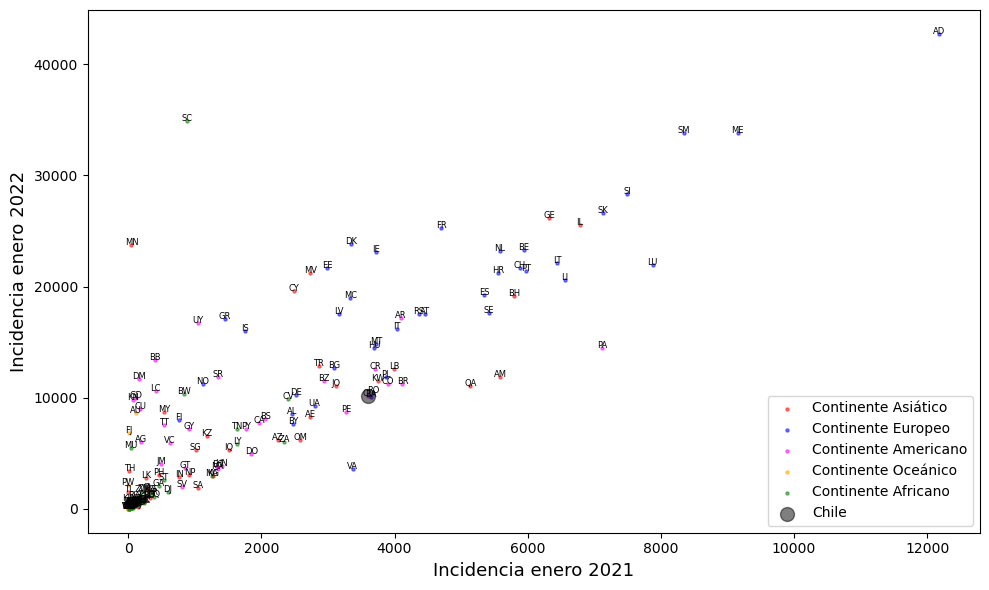

In [158]:
# Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022.
%matplotlib inline

idx = pd.IndexSlice

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

ax.scatter(x=table_reset_index.loc[idx['Asia',:],'incidencia 2021'],
           y=table_reset_index.loc[idx['Asia',:],'incidencia 2022'],s=5,c='r',alpha=0.5,label='Continente Asiático')

ax.scatter(x=table_reset_index.loc[idx['Europe',:],'incidencia 2021'],
           y=table_reset_index.loc[idx['Europe',:],'incidencia 2022'],s=5,c='b',alpha=0.5,label='Continente Europeo')

ax.scatter(x=table_reset_index.loc[idx['Americas',:],'incidencia 2021'],
           y=table_reset_index.loc[idx['Americas',:],'incidencia 2022'],s=5,c='magenta',alpha=0.5,label='Continente Americano')

ax.scatter(x=table_reset_index.loc[idx['Oceania',:],'incidencia 2021'],
           y=table_reset_index.loc[idx['Oceania',:],'incidencia 2022'],s=5,c='orange',alpha=0.5,label='Continente Oceánico')

ax.scatter(x=table_reset_index.loc[idx['Africa',:],'incidencia 2021'],
           y=table_reset_index.loc[idx['Africa',:],'incidencia 2022'],s=5,c='g',alpha=0.5,label='Continente Africano')

ax.scatter(x=table_reset_index.loc[idx[:,'Chile'],'incidencia 2021'],
           y=table_reset_index.loc[idx[:,'Chile'],'incidencia 2022'],s=100,c='k',alpha=0.5,label='Chile')

c=0
for x in table_reset_index.iloc[:,0]:
    label= x
    plt.annotate(label,(table_reset_index.iloc[c,1],table_reset_index.iloc[c,2]),ha='center',fontsize=6)
    c=c+1

ax.set_xlabel('Incidencia enero 2021',fontsize=13)
ax.set_ylabel('Incidencia enero 2022',fontsize=13)
ax.legend();

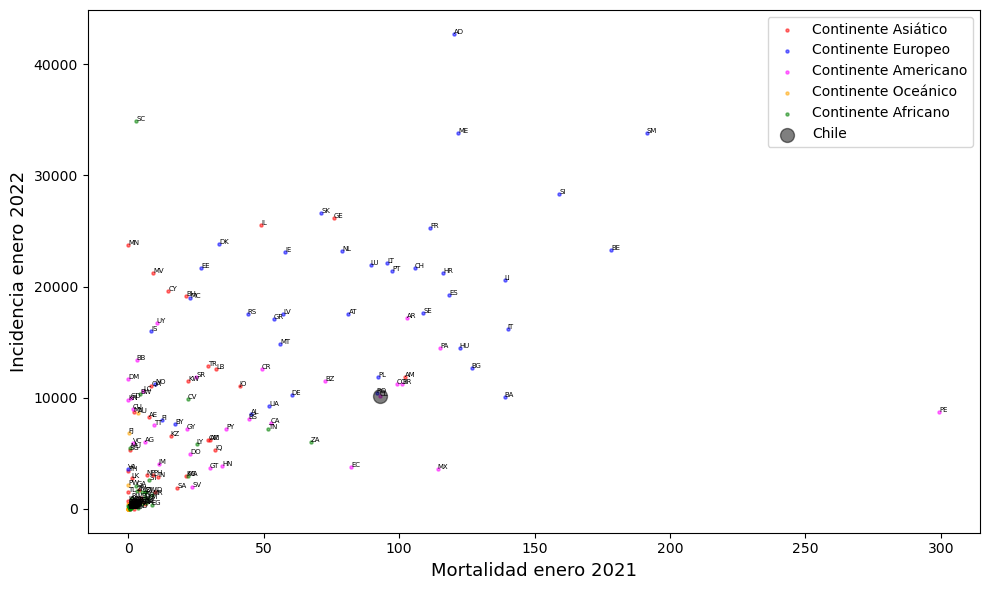

In [159]:
# Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022.
%matplotlib inline

idx = pd.IndexSlice

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

ax.scatter(x=table_reset_index.loc[idx['Asia',:],'mortalidad 2021'],
           y=table_reset_index.loc[idx['Asia',:],'incidencia 2022'],s=5,c='r',alpha=0.5,label='Continente Asiático')

ax.scatter(x=table_reset_index.loc[idx['Europe',:],'mortalidad 2021'],
           y=table_reset_index.loc[idx['Europe',:],'incidencia 2022'],s=5,c='b',alpha=0.5,label='Continente Europeo')

ax.scatter(x=table_reset_index.loc[idx['Americas',:],'mortalidad 2021'],
           y=table_reset_index.loc[idx['Americas',:],'incidencia 2022'],s=5,c='magenta',alpha=0.5,label='Continente Americano')

ax.scatter(x=table_reset_index.loc[idx['Oceania',:],'mortalidad 2021'],
           y=table_reset_index.loc[idx['Oceania',:],'incidencia 2022'],s=5,c='orange',alpha=0.5,label='Continente Oceánico')

ax.scatter(x=table_reset_index.loc[idx['Africa',:],'mortalidad 2021'],
           y=table_reset_index.loc[idx['Africa',:],'incidencia 2022'],s=5,c='g',alpha=0.5,label='Continente Africano')

ax.scatter(x=table_reset_index.loc[idx[:,'Chile'],'mortalidad 2021'],
           y=table_reset_index.loc[idx[:,'Chile'],'incidencia 2022'],s=100,c='k',alpha=0.5,label='Chile')

c=0
for x in table_reset_index.iloc[:,0]:
    label= x
    plt.annotate(label,(table_reset_index.iloc[c,3],table_reset_index.iloc[c,2]),fontsize=5)
    c=c+1

ax.set_xlabel('Mortalidad enero 2021',fontsize=13)
ax.set_ylabel('Incidencia enero 2022',fontsize=13)
ax.legend();

En base a los rankings y gráficas de nube de punto analice y discuta sobre el caso de Chile considerando las siguientes preguntas guía:

- ¿A qué países del mundo se parece más?
- ¿A qué países de América Latina se parece más?
- ¿A qué países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos) se parece más? 


## Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022.

1. Chile se parece a Romania (RO), Polonia (PL) y Colombia (CO) del mundo
1. Chile se parece a Peru (PE), Colombia (CO) y Argentina (AR) de América Latina
1. Chile se parece a Polonia (PL) y Colombia (CO) de la OCDE
1. Estos países al parecerse más a Chile, se puede traducir de la siguiente manera, que la tasa de confirmados en enero de 2022 y la tasa de mortalidad en 2021, los valores numéricos son cercanos entre sí.

## Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022.

1. Chile se parece a Bosnia and Herzegovina (BA), Romania (RO) del mundo
1. Chile se parece a Peru (PE), Colombia (CO) y Brasil (BR) de América Latina
1. Chile se parece a Costa Rica (CR), Polonia(PL) y Colombia (CO) de la OCDE
1. Estos países al asimilarse más a Chile implica que la Tasa de confirmados en enero del 2021 y 2022 la diferencia de los valores entre Chile y los países seleccionados es menor comparada a los demás.


## Análisis comparativo (1.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib` que permita realizar comparaciones entre las series de tiempo de COVID-19 de dos países seleccionados arbitrariamente. A modo de simplificación considere sólo los países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos). 

Requerimientos:

1. La interfaz debe incluir controles para escoger dos países a partir de una lista.
1. La interfaz debe incluir tres [tabs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Tabs), el primero debe mostrar las series de tiempo de ambos países de los casos confirmados, el segundo la de recuperados y el tercero la de los decesos, respectivamente. Use una leyenda para indicar el nombre de los países.
1. La interfaz debe tener un control que permita escoger entre casos acumulados y casos nuevos. Hint: Para los casos nuevos pueden revisar la función [`diff`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html).
1. La interfaz debe tener un control que permita escoger entre valores absolutos y valores relativos (tasas por 100.000 habitantes).
1. La interfaz debe tener un control que permita escoger entre valores diarios y valores semanales. Para esto último se recomienda usar `groupby` con una [frecuencia lunes a lunes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets).
    



In [160]:
#Analisis comparativo
paises =["Austria", "Belgium", "Canada", "Denmark", "France", "Germany", "Greece", "Ireland", "Iceland", "Italy", "Luxembourg", "Netherlands", "Norway", "Portugal", "Spain", "Sweden", "Switzerland", "Turkey", "United Kingdom", "US", "Japan", "Finland", "Australia", "New Zealand", "Mexico", "Czechia", "Korea, South", "Hungary", "Poland", "Slovakia", "Chile", "Israel", "Slovenia", "Estonia", "Latvia", "Lithuania", "Colombia", "Costa Rica"]
poblacion = data_popu["Population (2020)"]
paises_dicc = {pais: pais for pais in paises}


tab_contents = ['Casos Confirmados', 'Casos Recuperados', 'Casos Decesos']
variable_tabs = widgets.Tab()
variable_tabs.children = [widgets.Output() for i in range(len(tab_contents))]
for i in range(len(tab_contents)):
    variable_tabs.set_title(i, tab_contents[i])



def grafico(wid, wid2, wid3, wid4, wid5):
    if (wid3 == "Acumulados" or (wid3 == "Acumulados" and wid4 == "Absolutos")):
        pais_1_confirmados = data_confirmados.loc[paises_dicc[wid]]
        pais_1_recuperados = data_recuperados.loc[paises_dicc[wid]]
        pais_1_decesos = data_muertes.loc[paises_dicc[wid]]

        pais_2_confirmados = data_confirmados.loc[paises_dicc[wid2]]
        pais_2_recuperados = data_recuperados.loc[paises_dicc[wid2]]
        pais_2_decesos = data_muertes.loc[paises_dicc[wid2]]

        if (wid4 == "Relativos"):
            poblacion_1 = poblacion.loc[paises_dicc[wid]]
            poblacion_2 = poblacion.loc[paises_dicc[wid2]]
            pais_1_confirmados = data_confirmados.loc[paises_dicc[wid]] / poblacion_1 * 100000
            pais_1_recuperados = data_confirmados.loc[paises_dicc[wid]] / poblacion_1 * 100000
            pais_1_decesos = data_confirmados.loc[paises_dicc[wid]] / poblacion_1 * 100000

            pais_2_confirmados = data_confirmados.loc[paises_dicc[wid2]] / poblacion_2 * 100000
            pais_2_recuperados = data_confirmados.loc[paises_dicc[wid2]] / poblacion_2 * 100000
            pais_2_decesos = data_confirmados.loc[paises_dicc[wid2]] / poblacion_2 * 100000
        
    if (wid3 == "Nuevos" or (wid3 == "Nuevos" and wid4 == "Absolutos")):
        pais_1_confirmados = data_confirmados.loc[paises_dicc[wid]].diff().fillna(0)
        pais_1_recuperados = data_recuperados.loc[paises_dicc[wid]].diff().fillna(0)
        pais_1_decesos = data_muertes.loc[paises_dicc[wid]].diff().fillna(0)

        pais_2_confirmados = data_confirmados.loc[paises_dicc[wid2]].diff().fillna(0)
        pais_2_recuperados = data_recuperados.loc[paises_dicc[wid2]].diff().fillna(0)
        pais_2_decesos = data_muertes.loc[paises_dicc[wid2]].diff().fillna(0)

        if (wid4 == "Relativos"):
            poblacion_1 = poblacion.loc[paises_dicc[wid]]
            poblacion_2 = poblacion.loc[paises_dicc[wid2]]
            pais_1_confirmados = (pais_1_confirmados / poblacion_1) * 100000
            pais_1_recuperados = (pais_1_recuperados / poblacion_1) * 100000
            pais_1_decesos = (pais_1_decesos / poblacion_1) * 100000

            pais_2_confirmados = pais_2_confirmados / poblacion_2 * 100000
            pais_2_recuperados = pais_2_recuperados / poblacion_2 * 100000
            pais_2_decesos = pais_2_decesos / poblacion_2 * 100000
    
    if (wid5 == "Semanales"):
        pais_1_confirmados = pais_1_confirmados.groupby(pd.Grouper(freq='W-MON')).sum()
        pais_1_recuperados = pais_1_recuperados.groupby(pd.Grouper(freq='W-MON')).sum()
        pais_1_decesos = pais_1_decesos.groupby(pd.Grouper(freq='W-MON')).sum()

        pais_2_confirmados = pais_2_confirmados.groupby(pd.Grouper(freq='W-MON')).sum()
        pais_2_recuperados = pais_2_recuperados.groupby(pd.Grouper(freq='W-MON')).sum()
        pais_2_decesos = pais_2_decesos.groupby(pd.Grouper(freq='W-MON')).sum()

    if (variable_tabs.selected_index == 0):
        clear_output(wait=True)
        plt.figure(figsize=(10,6))
        plt.plot(pais_1_confirmados.index, pais_1_confirmados, label=wid)
        plt.plot(pais_2_confirmados.index, pais_2_confirmados, label=wid2)
        plt.title(tab_contents[variable_tabs.selected_index])
        plt.xlabel('Fecha')
        plt.ylabel('Confirmados')
        plt.legend()
        plt.show()
    if (variable_tabs.selected_index == 1):
        clear_output(wait=True)
        plt.figure(figsize=(10,6))
        plt.plot(pais_1_recuperados.index, pais_1_recuperados, label=wid)
        plt.plot(pais_2_recuperados.index, pais_2_recuperados, label=wid2)
        plt.title(tab_contents[variable_tabs.selected_index])
        plt.xlabel('Fecha')
        plt.ylabel('Recuperados')
        plt.legend()
        plt.show()
    if (variable_tabs.selected_index == 2):
        clear_output(wait=True)
        plt.figure(figsize=(10,6))
        plt.plot(pais_1_decesos.index, pais_1_decesos, label=wid)
        plt.plot(pais_2_decesos.index, pais_2_decesos, label=wid2)
        plt.title(tab_contents[variable_tabs.selected_index])
        plt.xlabel('Fecha')
        plt.ylabel('Muertes')
        plt.legend()
        plt.show()
        

for i in range(len(tab_contents)):
    with variable_tabs.children[i]:
        wid = widgets.Dropdown(description = "Pais 1:", options=paises, value = "Chile")
        wid2 = widgets.Dropdown(description = "Pais 2: ", options=paises )
        wid3 = widgets.Dropdown(description = "Casos: ", options = ["Acumulados", "Nuevos"])
        wid4 = widgets.Dropdown(description = "Valores: ", options = ["Absolutos", "Relativos"])
        wid5 = widgets.Dropdown(description = "Tiempo: ", options = ["Diarios", "Semanales"])
        variable_tabs.selected_index = i
        widgets.interact(grafico, wid = wid, wid2 = wid2, wid3 = wid3, wid4 = wid4, wid5 = wid5)

variable_tabs

## Dashboard interactivo (1.0pt)

Implemente un *dashboard web* interactivo a partir de la interfaz desarrollada en el punto anterior utilizando la librería [voila](https://github.com/voila-dashboards/voila). Sirva su interfaz en la nube, para esto puede considerar los servicios gratuitos [binder](https://mybinder.org/) o [heroku](https://www.heroku.com/free). Revise la documentación de voila [con respecto a *deployment* en la nube](https://voila.readthedocs.io/en/stable/deploy.html) y este repositorio con [un ejemplo en base a heroku](https://github.com/voila-dashboards/voila-heroku). 

Escriba el link de su dashboard web a continuación:

## Discusión final (1.0pt)

En base a su interfaz:   

1. Describa en detalle la situación de Chile con respecto a la evolución temporal de las series de tiempo. Destaque patrones y comportamientos que considere relevantes. Compare lo que observa en las distintas series de tiempo. 
1. Considerando la evolución a nivel de semana, conteste ¿En qué fechas ocurre un aumento o disminución notoria de los casos? ¿En qué fechas hay máximos y mínimos?
1. Considerando métricas que sean relativas compare el caso de Chile contra cinco países de la OCDE seleccionados por ustedes. Destaque semejanzas y diferencias considerando las cantidades y los posibles desfases temporales existentes.

## Respuestas:
1. Se puede observar un crecimiento exponencial de las casos confirmados y decesos desde enero del 2022 en Chile, antes de esa fecha el aumento era de forma lineal y constante, aunque también existen tres olas de casos confirmados a lo largo del lapso de tiempo bastante notorias cercano a los meses de abril de los tres años consecutivos. Los casos de personas recuperadas van en crecimiento exponencial desde julio del 2020.

1. El aumento de los casos nuevos ocurre en los meses de otoño-invierno generalmente (entre abril y julio), asimismo en los meses primavera-verano (Septiembre a enero) no hay un aumento en los casos nuevos y los casos acumulados se mantienen estables.

1. Se pueden observar desfases de aumento de casos en los meses de invierno para países donde las estaciones del año estén también en desfase con Chile, como por ejemplo Estados Unidos, Mexico, Canadá o Italia. Países donde hay curvas similares en magnitud a lo largo de 2020 hasta finales del 2021 son Colombia o Dinamarca. El patrón general entre todos los países es un aumento explosivo de los casos desde inicios de 2022.